## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [10]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [11]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [12]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation='relu')(x)
    x = keras.layers.Dense(units=32, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    return model
model = build_mlp()

In [14]:
"""
Compile 模型
"""
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total para

In [6]:
optimizer = keras.optimizers.Adam(lr=0.001)
optimizer_sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov = True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 15:00:56.795084 140219534100288 deprecation.py:237] From /home/simon/tf_workspace/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.9743 - acc: 0.2757 - val_loss: 1.8064 - val_acc: 0.3394
Epoch 2/500
50000/50000 [==============================] - 1s 19us/step - loss: 1.7522 - acc: 0.3678 - val_loss: 1.7411 - val_acc: 0.3835
Epoch 3/500
50000/50000 [==============================] - 1s 19us/step - loss: 1.6440 - acc: 0.4100 - val_loss: 1.6177 - val_acc: 0.4199
Epoch 4/500
50000/50000 [==============================] - 1s 19us/step - loss: 1.5647 - acc: 0.4411 - val_loss: 1.5829 - val_acc: 0.4350
Epoch 5/500
50000/50000 [==============================] - 1s 20us/step - loss: 1.5270 - acc: 0.4550 - val_loss: 1.5260 - val_acc: 0.4570
Epoch 6/500
50000/50000 [==============================] - 1s 19us/step - loss: 1.4921 - acc: 0.4644 - val_loss: 1.4999 - val_acc: 0.4657
Epoch 7/500
50000/50000 [==============================] - 1s 19us/step - loss: 1.4504 - acc: 0.4816 - val_loss: 1.4740 - 

50000/50000 [==============================] - 1s 19us/step - loss: 0.5584 - acc: 0.8021 - val_loss: 2.0022 - val_acc: 0.5096
Epoch 60/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.5537 - acc: 0.8005 - val_loss: 2.0797 - val_acc: 0.4970
Epoch 61/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.5494 - acc: 0.8052 - val_loss: 2.1372 - val_acc: 0.4989
Epoch 62/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.5352 - acc: 0.8084 - val_loss: 2.1540 - val_acc: 0.5046
Epoch 63/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.5263 - acc: 0.8114 - val_loss: 2.2036 - val_acc: 0.5028
Epoch 64/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.5313 - acc: 0.8123 - val_loss: 2.1341 - val_acc: 0.5094
Epoch 65/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.5065 - acc: 0.8188 - val_loss: 2.1443 - val_acc: 0.5054
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.2677 - acc: 0.9048 - val_loss: 3.1998 - val_acc: 0.4988
Epoch 119/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.2566 - acc: 0.9086 - val_loss: 3.3077 - val_acc: 0.5063
Epoch 120/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.2935 - acc: 0.8952 - val_loss: 3.3103 - val_acc: 0.4922
Epoch 121/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.2643 - acc: 0.9051 - val_loss: 3.2819 - val_acc: 0.4919
Epoch 122/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.3013 - acc: 0.8908 - val_loss: 3.2524 - val_acc: 0.4997
Epoch 123/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.2405 - acc: 0.9142 - val_loss: 3.4486 - val_acc: 0.4839
Epoch 124/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.3053 - acc: 0.8922 - val_loss: 3.3357 - val_acc: 0.5003
Epoch 125/500
50000/

50000/50000 [==============================] - 1s 19us/step - loss: 0.1805 - acc: 0.9359 - val_loss: 3.9773 - val_acc: 0.4920
Epoch 177/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.2055 - acc: 0.9280 - val_loss: 3.9359 - val_acc: 0.4894
Epoch 178/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.2237 - acc: 0.9219 - val_loss: 3.8197 - val_acc: 0.4830
Epoch 179/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1988 - acc: 0.9291 - val_loss: 3.8049 - val_acc: 0.5007
Epoch 180/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1859 - acc: 0.9345 - val_loss: 3.9364 - val_acc: 0.4960
Epoch 181/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.1586 - acc: 0.9445 - val_loss: 4.0358 - val_acc: 0.4892
Epoch 182/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1423 - acc: 0.9500 - val_loss: 4.0064 - val_acc: 0.4955
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 1s 20us/step - loss: 0.1428 - acc: 0.9509 - val_loss: 4.3559 - val_acc: 0.4816
Epoch 235/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1498 - acc: 0.9477 - val_loss: 4.2543 - val_acc: 0.4917
Epoch 236/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1643 - acc: 0.9439 - val_loss: 4.2170 - val_acc: 0.4900
Epoch 237/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.0975 - acc: 0.9669 - val_loss: 4.3418 - val_acc: 0.4907
Epoch 238/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.0810 - acc: 0.9723 - val_loss: 4.4568 - val_acc: 0.4916
Epoch 239/500
50000/50000 [==============================] - 1s 21us/step - loss: 0.1549 - acc: 0.9477 - val_loss: 4.3448 - val_acc: 0.4829
Epoch 240/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1909 - acc: 0.9356 - val_loss: 4.3862 - val_acc: 0.4807
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 1s 19us/step - loss: 0.1368 - acc: 0.9541 - val_loss: 4.5212 - val_acc: 0.4851
Epoch 293/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.1303 - acc: 0.9562 - val_loss: 4.5026 - val_acc: 0.4994
Epoch 294/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.0709 - acc: 0.9768 - val_loss: 4.6182 - val_acc: 0.4895
Epoch 295/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1650 - acc: 0.9453 - val_loss: 4.4476 - val_acc: 0.4902
Epoch 296/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.0979 - acc: 0.9664 - val_loss: 4.5710 - val_acc: 0.4918
Epoch 297/500
50000/50000 [==============================] - 1s 21us/step - loss: 0.0921 - acc: 0.9687 - val_loss: 4.5508 - val_acc: 0.4903
Epoch 298/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1504 - acc: 0.9493 - val_loss: 4.4723 - val_acc: 0.4955
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 1s 20us/step - loss: 0.1016 - acc: 0.9663 - val_loss: 4.6050 - val_acc: 0.4970
Epoch 351/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0639 - acc: 0.9783 - val_loss: 4.6782 - val_acc: 0.4933
Epoch 352/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0617 - acc: 0.9799 - val_loss: 4.8162 - val_acc: 0.4994
Epoch 353/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1266 - acc: 0.9575 - val_loss: 4.6322 - val_acc: 0.4952
Epoch 354/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1596 - acc: 0.9477 - val_loss: 4.5565 - val_acc: 0.4906
Epoch 355/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0997 - acc: 0.9655 - val_loss: 4.6384 - val_acc: 0.4897
Epoch 356/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0847 - acc: 0.9705 - val_loss: 4.7096 - val_acc: 0.4936
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 1s 19us/step - loss: 0.0594 - acc: 0.9807 - val_loss: 4.8635 - val_acc: 0.4929
Epoch 409/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0575 - acc: 0.9809 - val_loss: 4.8932 - val_acc: 0.4989
Epoch 410/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0943 - acc: 0.9690 - val_loss: 4.8210 - val_acc: 0.4920
Epoch 411/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.1199 - acc: 0.9601 - val_loss: 4.8508 - val_acc: 0.4939
Epoch 412/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0901 - acc: 0.9697 - val_loss: 4.7823 - val_acc: 0.4958
Epoch 413/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.0659 - acc: 0.9783 - val_loss: 4.8838 - val_acc: 0.4993
Epoch 414/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0415 - acc: 0.9865 - val_loss: 4.9488 - val_acc: 0.4982
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 1s 20us/step - loss: 0.0684 - acc: 0.9769 - val_loss: 4.8849 - val_acc: 0.4971
Epoch 467/500
50000/50000 [==============================] - 1s 20us/step - loss: 0.0655 - acc: 0.9782 - val_loss: 5.0947 - val_acc: 0.4802
Epoch 468/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1061 - acc: 0.9645 - val_loss: 4.8956 - val_acc: 0.4886
Epoch 469/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0613 - acc: 0.9795 - val_loss: 4.9236 - val_acc: 0.4900
Epoch 470/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0851 - acc: 0.9723 - val_loss: 5.1259 - val_acc: 0.4804
Epoch 471/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1235 - acc: 0.9603 - val_loss: 4.8360 - val_acc: 0.4915
Epoch 472/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.0747 - acc: 0.9752 - val_loss: 4.8349 - val_acc: 0.4911
Epoch 473/500
50000/50000 [=======

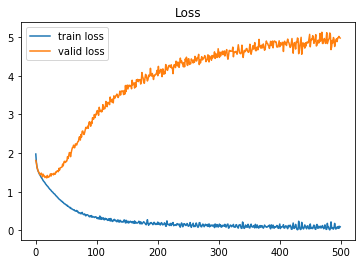

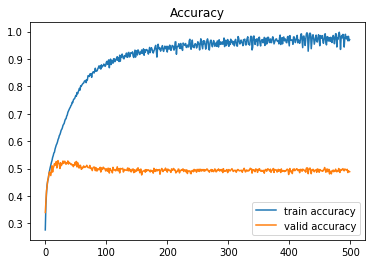

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
optimizer_sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov = True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer_sgd)

"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.9275 - acc: 0.2984 - val_loss: 1.7499 - val_acc: 0.3691
Epoch 2/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.6882 - acc: 0.3933 - val_loss: 1.6517 - val_acc: 0.4105
Epoch 3/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.5862 - acc: 0.4336 - val_loss: 1.5386 - val_acc: 0.4508
Epoch 4/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.5238 - acc: 0.4567 - val_loss: 1.5702 - val_acc: 0.4392
Epoch 5/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.4695 - acc: 0.4753 - val_loss: 1.5675 - val_acc: 0.4542
Epoch 6/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.4275 - acc: 0.4923 - val_loss: 1.6050 - val_acc: 0.4240
Epoch 7/500
50000/50000 [==============================] - 1s 17us/step - loss: 1.3904 - acc: 0.5045 - val_loss: 1.4738 - 

50000/50000 [==============================] - 1s 17us/step - loss: 0.3508 - acc: 0.8737 - val_loss: 2.2545 - val_acc: 0.5224
Epoch 60/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.3559 - acc: 0.8715 - val_loss: 2.3088 - val_acc: 0.5202
Epoch 61/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.3473 - acc: 0.8758 - val_loss: 2.2119 - val_acc: 0.5257
Epoch 62/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.3159 - acc: 0.8859 - val_loss: 2.5075 - val_acc: 0.5103
Epoch 63/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.3288 - acc: 0.8813 - val_loss: 2.4817 - val_acc: 0.5141
Epoch 64/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.3053 - acc: 0.8901 - val_loss: 2.4744 - val_acc: 0.5175
Epoch 65/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.3140 - acc: 0.8861 - val_loss: 2.4612 - val_acc: 0.5263
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.1039 - acc: 0.9642 - val_loss: 3.6084 - val_acc: 0.5278
Epoch 119/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.1038 - acc: 0.9641 - val_loss: 3.7790 - val_acc: 0.5236
Epoch 120/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.1138 - acc: 0.9600 - val_loss: 3.6435 - val_acc: 0.5324
Epoch 121/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0922 - acc: 0.9681 - val_loss: 3.8069 - val_acc: 0.5099
Epoch 122/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.1160 - acc: 0.9587 - val_loss: 3.6076 - val_acc: 0.5282
Epoch 123/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.1060 - acc: 0.9631 - val_loss: 3.6955 - val_acc: 0.5189
Epoch 124/500
50000/50000 [==============================] - 1s 19us/step - loss: 0.1194 - acc: 0.9579 - val_loss: 3.7552 - val_acc: 0.5064
Epoch 125/500
50000/

Epoch 176/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.0600 - acc: 0.9797 - val_loss: 4.0889 - val_acc: 0.5292
Epoch 177/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0449 - acc: 0.9847 - val_loss: 4.0778 - val_acc: 0.5337
Epoch 178/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.0636 - acc: 0.9779 - val_loss: 4.1650 - val_acc: 0.5281
Epoch 179/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.0633 - acc: 0.9784 - val_loss: 4.0160 - val_acc: 0.5336
Epoch 180/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.0542 - acc: 0.9810 - val_loss: 4.0413 - val_acc: 0.5337
Epoch 181/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.0283 - acc: 0.9905 - val_loss: 4.1769 - val_acc: 0.5392
Epoch 182/500
50000/50000 [==============================] - 1s 18us/step - loss: 0.0443 - acc: 0.9846 - val_loss: 4.2329 - val_acc: 0.5252
Epoch 183/500
50000/

50000/50000 [==============================] - 1s 17us/step - loss: 0.0157 - acc: 0.9952 - val_loss: 4.3094 - val_acc: 0.5399
Epoch 235/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0265 - acc: 0.9910 - val_loss: 4.3464 - val_acc: 0.5369
Epoch 236/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0270 - acc: 0.9906 - val_loss: 4.4127 - val_acc: 0.5278
Epoch 237/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0415 - acc: 0.9864 - val_loss: 4.2935 - val_acc: 0.5399
Epoch 238/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0268 - acc: 0.9913 - val_loss: 4.3380 - val_acc: 0.5446
Epoch 239/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0391 - acc: 0.9867 - val_loss: 4.4717 - val_acc: 0.5313
Epoch 240/500
50000/50000 [==============================] - 1s 17us/step - loss: 0.0572 - acc: 0.9810 - val_loss: 4.2966 - val_acc: 0.5354
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 1s 18us/step - loss: 1.7480e-04 - acc: 1.0000 - val_loss: 4.4617 - val_acc: 0.5534
Epoch 293/500
50000/50000 [==============================] - 1s 17us/step - loss: 1.3596e-04 - acc: 1.0000 - val_loss: 4.4805 - val_acc: 0.5532
Epoch 294/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.2138e-04 - acc: 1.0000 - val_loss: 4.4873 - val_acc: 0.5546
Epoch 295/500
50000/50000 [==============================] - 1s 17us/step - loss: 1.0703e-04 - acc: 1.0000 - val_loss: 4.4965 - val_acc: 0.5550
Epoch 296/500
50000/50000 [==============================] - 1s 17us/step - loss: 9.8878e-05 - acc: 1.0000 - val_loss: 4.5076 - val_acc: 0.5561
Epoch 297/500
50000/50000 [==============================] - 1s 17us/step - loss: 9.1230e-05 - acc: 1.0000 - val_loss: 4.5144 - val_acc: 0.5550
Epoch 298/500
50000/50000 [==============================] - 1s 18us/step - loss: 8.7137e-05 - acc: 1.0000 - val_loss: 4.5217 - val_acc: 0.5561
Epoch 

Epoch 349/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.7514e-05 - acc: 1.0000 - val_loss: 4.6627 - val_acc: 0.5571
Epoch 350/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.7172e-05 - acc: 1.0000 - val_loss: 4.6641 - val_acc: 0.5568
Epoch 351/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.6927e-05 - acc: 1.0000 - val_loss: 4.6658 - val_acc: 0.5567
Epoch 352/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.6589e-05 - acc: 1.0000 - val_loss: 4.6674 - val_acc: 0.5572
Epoch 353/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.6316e-05 - acc: 1.0000 - val_loss: 4.6685 - val_acc: 0.5566
Epoch 354/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.6060e-05 - acc: 1.0000 - val_loss: 4.6705 - val_acc: 0.5573
Epoch 355/500
50000/50000 [==============================] - 1s 17us/step - loss: 2.5718e-05 - acc: 1.0000 - val_loss: 4.6718 - val_acc:

Epoch 406/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.6681e-05 - acc: 1.0000 - val_loss: 4.7305 - val_acc: 0.5582
Epoch 407/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.6571e-05 - acc: 1.0000 - val_loss: 4.7314 - val_acc: 0.5584
Epoch 408/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.6455e-05 - acc: 1.0000 - val_loss: 4.7325 - val_acc: 0.5582
Epoch 409/500
50000/50000 [==============================] - 1s 17us/step - loss: 1.6347e-05 - acc: 1.0000 - val_loss: 4.7333 - val_acc: 0.5586
Epoch 410/500
50000/50000 [==============================] - 1s 17us/step - loss: 1.6235e-05 - acc: 1.0000 - val_loss: 4.7341 - val_acc: 0.5586
Epoch 411/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.6135e-05 - acc: 1.0000 - val_loss: 4.7350 - val_acc: 0.5584
Epoch 412/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.6045e-05 - acc: 1.0000 - val_loss: 4.7360 - val_acc:

Epoch 463/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.2119e-05 - acc: 1.0000 - val_loss: 4.7741 - val_acc: 0.5587
Epoch 464/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.2070e-05 - acc: 1.0000 - val_loss: 4.7748 - val_acc: 0.5584
Epoch 465/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.2010e-05 - acc: 1.0000 - val_loss: 4.7752 - val_acc: 0.5585
Epoch 466/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.1950e-05 - acc: 1.0000 - val_loss: 4.7758 - val_acc: 0.5585
Epoch 467/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.1899e-05 - acc: 1.0000 - val_loss: 4.7764 - val_acc: 0.5583
Epoch 468/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.1849e-05 - acc: 1.0000 - val_loss: 4.7771 - val_acc: 0.5585
Epoch 469/500
50000/50000 [==============================] - 1s 18us/step - loss: 1.1788e-05 - acc: 1.0000 - val_loss: 4.7776 - val_acc:

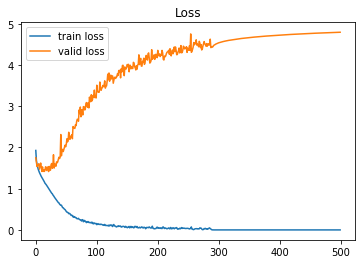

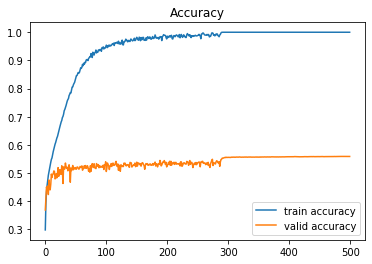

In [16]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()